In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")

In [ ]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [7]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']
xtrain,x_test,ytrain,y_test = train_test_split(x,y, stratify = y,shuffle = True,random_state = 0)
sampler = RandomUnderSampler(random_state=11)#sprawdzic jak dokladnie dziala
x_train, y_train = sampler.fit_resample(xtrain, ytrain)#smote,adasyn,2:1

In [8]:
svclassifier = SVC(kernel = 'linear',C=3,class_weight = 'balanced',random_state = 0)
svclassifier.fit(x_train,y_train)

SVC(C=3, class_weight='balanced', kernel='linear', random_state=0)

In [9]:
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41561 15886]
 [ 1088  4885]]
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     57447
         1.0       0.24      0.82      0.37      5973

    accuracy                           0.73     63420
   macro avg       0.60      0.77      0.60     63420
weighted avg       0.90      0.73      0.79     63420



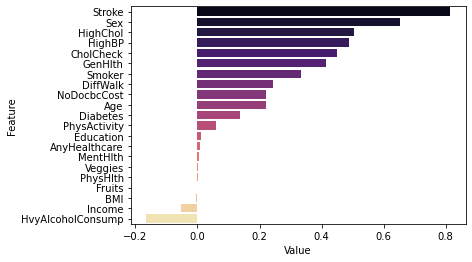

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
from math import fabs
danex = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
daney =svclassifier.coef_[0]
datafr = pd.DataFrame({"Feature":danex,
                      "Value":fabs(daney)})
sns.barplot(x = 'Value',y='Feature', data = datafr,palette = 'magma',order=datafr.sort_values('Value',ascending = False).Feature)

plt.savefig('../Plots/SVCFeature2.png')
#wartosc bezwzgledna, poniewaz ujemne wartosci ciagna w klasyfikacje do klasy 0

In [19]:
order=datafr.sort_values('Value',ascending = False).Feature
order

5                Stroke
17                  Sex
1              HighChol
0                HighBP
2             CholCheck
13              GenHlth
4                Smoker
16             DiffWalk
12          NoDocbcCost
18                  Age
6              Diabetes
7          PhysActivity
19            Education
11        AnyHealthcare
14             MentHlth
9               Veggies
15             PhysHlth
8                Fruits
3                   BMI
20               Income
10    HvyAlcoholConsump
Name: Feature, dtype: object

In [22]:
sm = SMOTE(random_state=42)
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state=0,stratify =y,shuffle = True)
x_train, y_train = sm.fit_resample(xtrain, ytrain)

In [ ]:
svclassifier = SVC(kernel = 'linear',C=3,class_weight = 'balanced',random_state = 0)
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
adasyn = ADASYN()
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state=0,shuffle = True,stratify = y)
x_train, y_train = adasyn.fit_resample(xtrain, ytrain)

In [ ]:
svclassifier = SVC(kernel = 'linear',C=3,class_weight = 'balanced',random_state = 0)
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
recall = []

df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack'] # under
x1 = x
out = []
for i in range(len(features)):
    y = df['HeartDiseaseorAttack']
    out.append(features[i])
    x1= x.drop(columns=out)
    
    print(f'ilosc features:{len(x1.columns)}')
    sampler = RandomUnderSampler(random_state=11)
    xtrain,x_test,ytrain,y_test = train_test_split(x1,y,random_state = 0,stratify = y)
    x_train, y_train = sampler.fit_resample(xtrain, ytrain)
    svclassifier = SVC(kernel = 'linear',C=3,class_weight = 'balanced',random_state = 0)
    svclassifier.fit(x_train,y_train)
    y_pred = Tree_classifier.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    recall.append(recall_score(y_test,y_pred))

In [ ]:
osX = []
for i in range(len(features)):
    osX.append(i)


osX.sort(reverse=True)
osX.pop(-1)

sns.lineplot(x = osX,y=recall,palette='magma')
plt.ylabel('Recall [%]')
plt.xlabel('Ilość cech [od najważniejszej do najmniej ważnych]')
plt.savefig('../Plots/SVC_Feature_recall.png')